

> ## **s259444 Maurizio Pinna**

> **Data Spaces Thesis - 01RLPOV // Accademic Year: 2019/2020**

# Introduction

The dataset under analysis is taken from UCI machine learning repository.
The data was collected retrospectively at Wroclaw Thoracic Surgery Centre for patients who underwent major lung resections for primary lung cancer in the years between 2007 and 2011. The Centre is associated with the Department of Thoracic Surgery of the Medical University of Wroclaw and Lower-Silesian Centre for Pulmonary Diseases, Poland, while the research database constitutes a part of the National Lung Cancer Registry, administered by the Institute of Tuberculosis and Pulmonary Diseases in Warsaw, Poland.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
seed = 1234
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import recall_score,f1_score,precision_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import collections


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd /content/gdrive/My Drive/Colab Notebooks/DATA SPACES THESIS

/content/gdrive/My Drive/Colab Notebooks/DATA SPACES THESIS


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/DATA SPACES THESIS/ThoraricSurgery.csv')

In [ ]:
print("The dataset has %d rows and %d columns." % df.shape)

The dataset has 470 rows and 18 columns.


The dataset is composed by 470 variables. There are some nominal variables, like the diagnosis DGN, some hystorical medical information, risk factor as smoking, demografic information as the age. Let's now list the description of all the variables.

1.   **DGN** Is the diagnosis. It is rapresented by an ICD-10 code. ICD-10 is the 10th revision of the International Statistical Classification of Diseases and Related Health Problems (ICD), a medical classification list by the World Health Organization (WHO). Those codes can rapresent the diagnosis for primary and secondary as well multiple tumours if any.
2.   **PRE4** Forced vital capacity - FVC (numeric)
1.   **PRE5** Volume that has been exhaled at the end of the first second of forced expiration - FEV1 (numeric)
2.   **PRE6** Performance status - Zubrod scale (PRZ2,PRZ1,PRZ0)
1.   **PRE7** Pain before surgery (T,F)
2.   **PRE8** Haemoptysis before surgery (T,F)
1.   **PRE9** Dyspnoea before surgery (T,F)
2.   **PRE10** Cough before surgery (T,F)
1.   **PRE11** Weakness before surgery (T,F)
2.   **PRE14** T in clinical TNM - size of the original tumour, from OC11 (smallest) to OC14 (largest) (OC11,OC14,OC12,OC13)
1.   **PRE17** Type 2 DM - diabetes mellitus (T,F)
2.   **PRE19** MI up to 6 months. Is an indicator telling whether the patient had a heart attack within the 6 months leading up to the surgery (T,F)
1.   **PRE25** PAD - peripheral arterial diseases (T,F)
2.   **PRE30** Smoking (T,F)
1.   **PRE32** Asthma (T,F)
2.   **AGE** Age at surgery (numeric)

Then there's only one target variable, that is the 1 one year survival period, and it is binary valued. True value if the patient has died, F if not.




















Looking at the variables, we notice that some preprocessing is needed. First thing first, we can assign to the variables some mnemonic names, in order to access them in an easier way. 
Then, the DGN variable is a categorical one, we can assume that there is no order between the possible values. It is known that machine learning algorithms need numerical inputs. So we might think to assing an integer number to each diagnosis. But this can be dangerous, because our model can infer some kind of order in the values. For example if we convert DGN1 to 1, DGN2 to 2 and DGN 8 to 8, our machine learning algorithms will assume that the nearby values are more similar, but we don't know if this make sense, we assume that it doesn't. So, for solving this problem, we use ***1 hot encoding***. With this mapping the number of fetures goes from 17 to 23, because we add a boolean feature for each diagnosis and we can drop the categorical feature itself.

In [ ]:
df = df.drop(columns='id')


In [ ]:
df = df.rename(columns={'PRE4':'FVC', 'PRE5':'FEV1','PRE6':'PStat', 'PRE7':'Pain','PRE8':'Hoem'})
df = df.rename(columns={'PRE9':'Dyspno','PRE10':'Cough','PRE11':'Weakness','PRE14':'Size','PRE17':'DM'})
df = df.rename(columns={'PRE19':'MI','PRE25':'PAD', 'PRE30':'Smoke','PRE32':'Ashtma'})

In [ ]:
df.head(5)

,DGN,FVC,FEV1,PStat,Pain,Hoem,Dyspno,Cough,Weakness,Size,DM,MI,PAD,Smoke,Ashtma,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [ ]:
df['DGN']=pd.Categorical(df['DGN'])
dfDummies=pd.get_dummies(df['DGN'])
df = pd.concat([df, dfDummies], axis=1)
df = df.drop(columns='DGN')
df.head(5)

,FVC,FEV1,PStat,Pain,Hoem,Dyspno,Cough,Weakness,Size,DM,MI,PAD,Smoke,Ashtma,AGE,Risk1Yr,DGN1,DGN2,DGN3,DGN4,DGN5,DGN6,DGN8
0,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F,0,1,0,0,0,0,0
1,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F,0,0,1,0,0,0,0
2,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F,0,0,1,0,0,0,0
3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F,0,0,1,0,0,0,0
4,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T,0,0,1,0,0,0,0


While the Diagnosis is a categorical data, Performance Status and the size of the original tumor are ordinal attributes, so we can map them into numerical.

In [ ]:
df = df.replace({'PRZ0':0,'PRZ1':1,'PRZ2':2})
df = df.replace({'OC11':1, 'OC12':2, 'OC13':3, 'OC14':4})
df =df.replace({'T':1, 'F':0})
df.head(5)

,FVC,FEV1,PStat,Pain,Hoem,Dyspno,Cough,Weakness,Size,DM,MI,PAD,Smoke,Ashtma,AGE,Risk1Yr,DGN1,DGN2,DGN3,DGN4,DGN5,DGN6,DGN8
0,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0,0,1,0,0,0,0,0
1,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0,0,0,1,0,0,0,0
2,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0,0,0,1,0,0,0,0
3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0,0,0,1,0,0,0,0
4,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1,0,0,1,0,0,0,0


In [ ]:
df.isnull().sum()

FVC         0
FEV1        0
PStat       0
Pain        0
Hoem        0
Dyspno      0
Cough       0
Weakness    0
Size        0
DM          0
MI          0
PAD         0
Smoke       0
Ashtma      0
AGE         0
Risk1Yr     0
DGN1        0
DGN2        0
DGN3        0
DGN4        0
DGN5        0
DGN6        0
DGN8        0
dtype: int64

It seems that we do not have missing values. This is may due to the fact that the rows are about five hundreds that are not so much in respect some other clinical datasets.

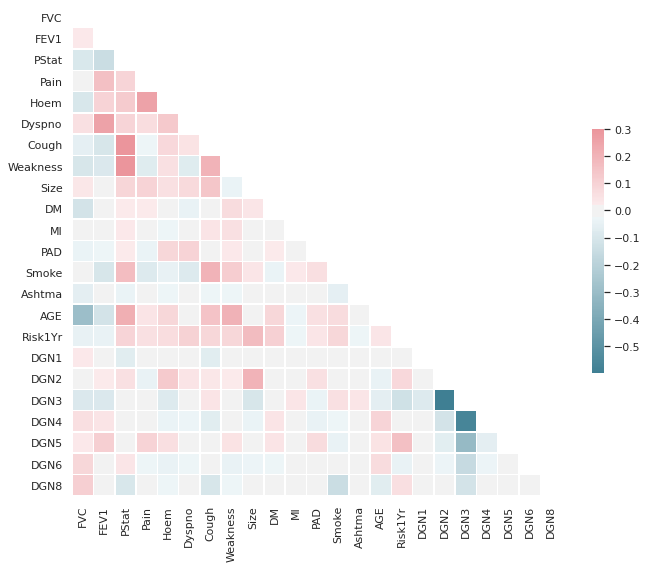

In [ ]:
from string import ascii_letters

sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

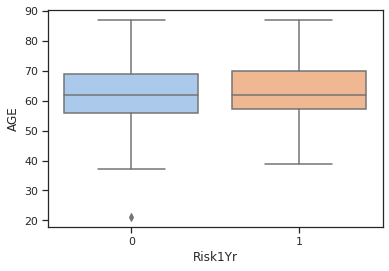

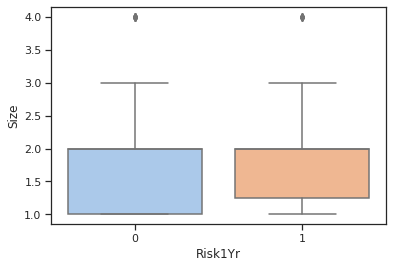

In [ ]:
sns.set(style="ticks", palette="pastel")
sns.boxplot(y="AGE",data=df,x="Risk1Yr")
plt.show()
sns.boxplot(y="Size", data=df, x="Risk1Yr")
plt.show()

Looking at the box plot of the age, we notice that the age variable don't separate the target variable, since they are overlapped. Now let's plot some bar chart to have an idea on how the other binary variables are involved in the target one.

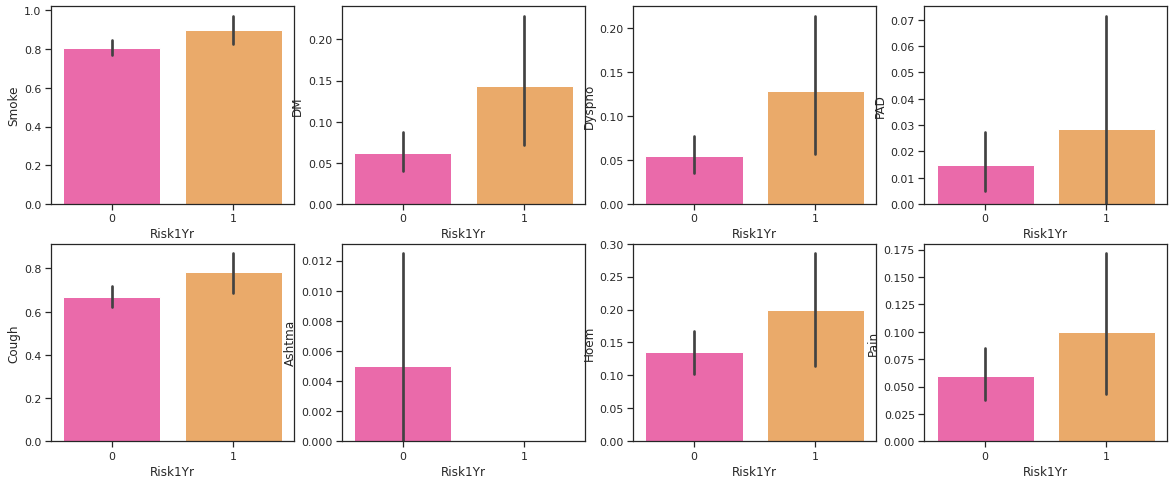

In [ ]:
f, axes = plt.subplots(2,4,figsize=(20, 8))
sns.barplot(palette="spring",data=df,y='Smoke',x=df['Risk1Yr'], ax=axes[0, 0]);
sns.barplot(palette="spring",data=df,y='DM',x=df['Risk1Yr'],ax=axes[0,1]);
sns.barplot(palette="spring",data=df,y='Dyspno',x=df['Risk1Yr'],ax=axes[0,2]);
sns.barplot(palette="spring",data=df,y='PAD',x=df['Risk1Yr'],ax=axes[0, 3]);
sns.barplot(palette="spring",data=df,y='Cough',x=df['Risk1Yr'],ax=axes[1, 0]);
sns.barplot(palette="spring",data=df,y='Ashtma',x=df['Risk1Yr'],ax=axes[1, 1]);
sns.barplot(palette="spring",data=df,y='Hoem',x=df['Risk1Yr'],ax=axes[1, 2]);
sns.barplot(palette="spring",data=df,y='Pain',x=df['Risk1Yr'],ax=axes[1, 3]);

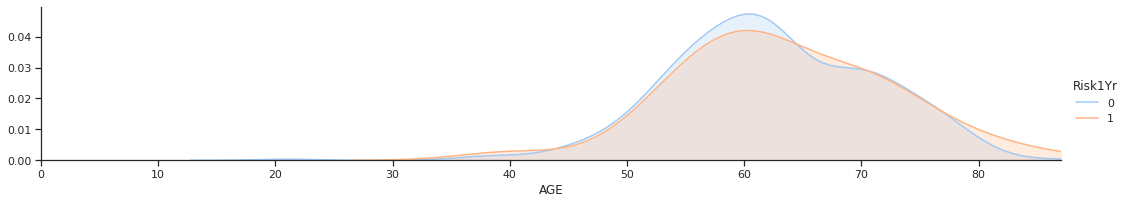

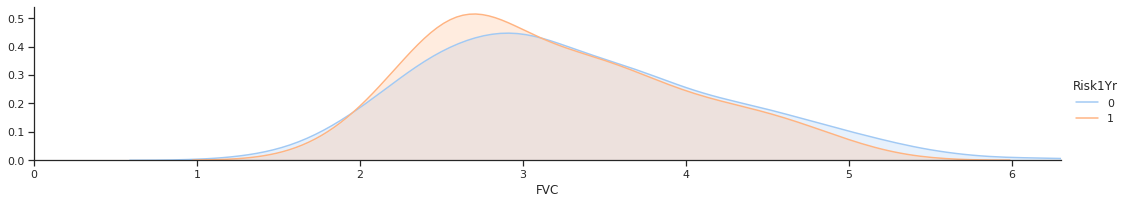

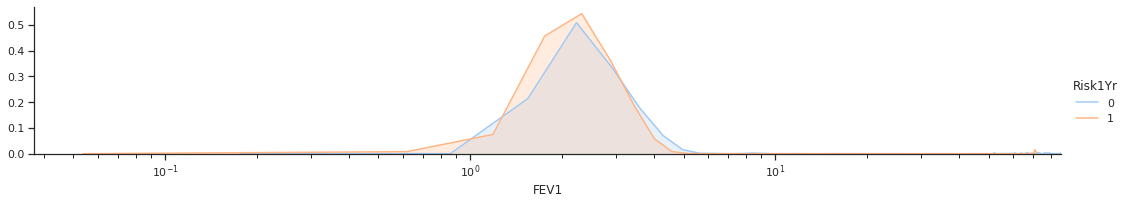

In [ ]:
for feature in ['AGE','FVC','FEV1',]:
    as_fig = sns.FacetGrid(df,hue='Risk1Yr',aspect=5)
    if(feature is'FEV1'):
      as_fig.set(xscale='log')
    as_fig.map(sns.kdeplot,feature,shade=True)
    oldest = df[feature].max()
    as_fig.set(xlim=(0,oldest))
    as_fig.add_legend()

With the density plots displayed above, we see that the 1 years survival period is higher in a age range between 55 and 65, so in peaople that are younger when they had thoracic surgery.

## Distribution of the target class

In [ ]:
print(f"{(df['Risk1Yr'] == 0).sum()} Person survived after one year from surgery ")
print(f"{(df['Risk1Yr'] == 1).sum()} Person not survived after one year from surgery ")


400 Person survived after one year from surgery 
70 Person not survived after one year from surgery 


We can see that the distribution the two classes in the dataset is really unbalanced. So it will be easier for the algorithm to predict the class more rapresented. This is not fine, especially because in this dataset, we are dealing with human lives. So we have to be careful with mispredictions. If we think that for example our ML algorithm is used also by the doctors to know which patients monitor more, one thing the algoritm mispredict class 0 and the patient goes for further investigation after the surgery; and quite something else is if the algorithm mispredict class 1, and so the patient is not monitored enough and then dies.

There are 4 ways of addressing class imbalance problems like these:
*   Synthesis of new minority class instances
*   Over-sampling of minority class
*   Under-sampling of majority class
*   tweak the cost function to make misclassification of minority instances more important than misclassification of majority instances

This is already a small dataset, so under-sampling the majority might be not a good idea. Let's explore the other possibilities, in particular the synthesis of new minority class instances with the SMOTE technique.

# How does SMOTE resolve the class imbalance problem?
SMOTE synthesises new minority instances between existing (real) minority instances. Imagine that SMOTE draws lines between existing minority instances like this.

![alt text](https://raw.githubusercontent.com/rikunert/SMOTE_visualisation/master/SMOTE_R_visualisation_2.png)
SMOTE then imagines new, synthetic minority instances somewhere on these lines.
![alt text](https://raw.githubusercontent.com/rikunert/SMOTE_visualisation/master/SMOTE_R_visualisation_3.png)
After synthesising new minority instances, the imbalance shrinks from 4 red versus 13 green to 12 red versus 13 green. Red flowers now dominate within the ranges typical for red flowers on both axes.

The SMOTE function takes into as parameter K. This is because this technique uses the k-nearest neighbor algorithm to find the k-nearest neighbors of an instance xi.                                                 
At K = 1 only the closest neighbour of the same class is considered. Let’s take the bottom right, red data point. By drawing a circle around the dot on the plot, we can easily see that the top left flower is its closest neighbour. Thus, at K = 1 SMOTE() synthesises a new minority instance on the line between these two dots when the bottom right flower is considered.
![alt text](https://raw.githubusercontent.com/rikunert/SMOTE_visualisation/master/SMOTE_R_visualisation_4.png)
At K = 2 both the closest and the second closest neighbours are considered. For each new synthesis, a new one is randomly chosen between them.
![alt text](https://raw.githubusercontent.com/rikunert/SMOTE_visualisation/master/SMOTE_R_visualisation_5.png)
So for creating a synthetic instance xnew, a random instance x is chosen from the k-nearest neighbors, then the corresponding feature vector difference is multiplied with a random number between [0,1] and finally this vector is added to xi.
    \begin{equation}
        x_{new} = x_i + (x − x_i) × δ(1) 
    \end{equation}
        
where xi is a minority instance, x is the randomly chosen k-nearest neighbor, and δ is a random number between 0 and 1.






# Classification Techniques
## K-Nearest neighbours
K-Nearest Neighbors
K-Nearest Neighbors (KNN) is a non-parametric and instance-based classifier. It looks at the K points in the training set that are nearest to the test point x, than counts the number of members of each class in this set and returns that empirical fraction as the estimate. More formally, given a positive integer K, a test point x and a similarity metric d, it performs the following steps:

It runs through the whole dataset computing d between x and each training observation;
It estimates the conditional probability for each class, that is, the fraction of points in A (K points in the training data that are closest to x) with that given class label.
Finally, our test point x gets assigned to the class with the largest probability.                                                               
Possible distance metrics d are: Euclidean, Minkowski, and others.
K is a hyperparameter, it depends upon the data, is decided by the designer and controls the shape of the decision boundary. If k is too small, sensitive to noise points; if k is too large, neighborhood may include points from other classes.

Knn is not interpretable, because you don't have a model, so you cannot use it to interpreter the meaning of classes, but you can use the information on the objects which allowed you to the classification, to try to figure out somehow, how this classification took place, this is not very good for interpretability, but is at least a hint. This type of classification is slow during label assignement, because when you assign a label to a new object, it has to compute all the distances of this object from all the other points on the training set. So, this two just listed can be disadvantages.
One advantage of this tecnique is that it is incremental, because if you have the training set with you, you can add data to the training set, recompute the distances and you are done.


## Decision Trees
Decision Tree is a classifer with a flowchart-like structure in which each internal node represents a "test" on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label. The paths from root to leaf represent classification rule. Tree complexity is measured by means of: total number of nodes, number of attributes, number of leaves and tree depth.

Two main steps are required to use this algorithm for classification purpose: Tree construction and Tree pruning. Tree construction is done through a greedy algorithm that construct the tree with a top-down approach. At each iteration a partition of the training set is considered, this partition is then subdived into smaller subset according to a splitting criterion. 

Decision Trees like othes classifiers can be affected by underfitting and overfitting. Let's try to dedscribe theese two situation with the help of a plot.

![alt text](https://drive.google.com/uc?id=1ZUMYKC7nw5Fdi3g00AvLdQ2FmsawtRM-)

**Underfitting**: in this case we say that we didn't allow the classifier to have enough nodes to learn enough information from the training set, so that the model was capable of doing the classification. The the model is too generic, is not capable of handling the cases arrving in the test set.
The error decreases because the more increases the number of nodes, the more the classifier learns to perform well.</br>
**Steady State**:is the level at which the classifier can perform at best. It cannot improve more than that. We can grow nodes  as much as we want but we cannot obtain better perfomances.</br>
**Overfitting**:the error goes up again. Why this? Because it's like the classifier learnt too much about the training data, and when it has to predict unlabeled data from the test set, it is not capable anymore to generalize to different data objects.

### How to address overfitting
**Pre-Pruning (Early Stopping Rule)**
*   Stop the algorithm before it becomes a fully-grown tree
*   Typical stopping conditions for a node
> *   Stop if all instances belong to the same class
  *   Stop if all the attribute values are the same
*   More restrictive conditions
> * Stop if number of instances is less than some user-specified
threshold
  * Stop if number of instances is less than some user-specified
threshol(e.g. Gini)

**Post-Pruning**
* Grow decision tree to its entirety
* Trim the nodes of the decision tree in a bottomup fashion
* If generalization error improves after trimming,
replace sub-tree by a leaf node.
* Class label of leaf node is determined from
majority class of instances in the sub-tree

In this analysis Gini index is used.    
Gini index is an impurity-based criterion that measure the impurity of a data partition. It is defined as:  
    
\begin{equation}
Gini(D)=1- \sum{[p(j|t)^2]}
\end{equation}

p( j | t) is the relative frequency of class j at node t.

Maximum (1 - 1/nc) when records are equally distributed
among all classes, implying higher impurity degree.                           
Minimum (0.0) when all records belong to one class,
implying lower impurity degree

Let's make some concrete examples to understand how Gini is calculated

|Example 1|Example 2|Example 3|
|--|--|--|
|<table> <tr><td>C1</td><td>0</td></tr><tr><td>C2</td><td>6</td></tr><th>P(C1) = 0/6 ; P(C2)= 6/6=1</br>Gini=1-0-1=0</th></table>| <table> <tr><td>C1</td><td>1</td></tr><tr><td>C2</td><td>5</td></tr><th>P(C1) = 1/6 ; P(C2)= 5/6=1</br>Gini=1-(1/6)^2-(5/6)^2 = 0.278</th></table>|<table> <tr><td>C1</td><td>2</td></tr><tr><td>C2</td><td>4</td></tr><th>P(C1) = 2/6 ; P(C2)= 4/6=1</br>Gini=1-(2/6)^2 - (4/6)=0.444</th></table>|

When a node p is split into k partitions (children), the
quality of the split is computed as
\begin{equation}
GINI(split) = 1- \sum_{i=1}^k{\frac{ni}{n}GINI(i)}
\end{equation}

where:</br>
ni = number of record at child i</br>
n = number of records at node p

If for example we want to compute the Gini index on a boolean attribute:

![alt text](https://drive.google.com/uc?id=1DWujXHsMbwURkF170LnuJe0jaWVUCVEi)








## Random Forest

Random forest classifier is an ensamble learning method since it use multiple learning algorithms to obtain better predictive performance.

It creates a set of decision trees from randomly selected subset of training set and then aggregates the votes from different decision trees to decide the final class of the test object.

The hyperparameters of a random forest include the following ones:

n_estimators: the number of trees
criterion: the criterion which decides the feature and the value at the split (default='gini')
max_depth: the maximum depth of each tree (default=None)
min_samples_split: the minimum number of samples in a node to be considered for further splitting (default=2)
max_features: the number of features which are considered for a split (default='auto')

![alt text](https://drive.google.com/uc?id=1dj5-E94K1zRMctE8megU11UaPtZaravg)

**Strong points:**</br>
◼ higher accuracy than decision trees</br>
◼ fast training phase</br>
◼ robust to noise and outliers</br>
◼ provides global feature importance, i.e. an estimate of
which features are important in the classification</br>

**Weak points:**</br>
Results can be difficult to interpret. A prediction is given by hundreds of trees. But at least we have an indication through feature importance

## Support Vector Machine
SVM is a discriminative classifier formally defined by a separating hyperplane. It can be used both for linear and non-linear data. Given labeled training data, an SVM finds the maximum separating hyperplane, that is, the one with maximum distance between the nearest training tuples.

The hyperparameters of a support vector machine include the following ones:
* **decision_function_shape**: in this case one-vs-one (‘ovo’)
* **C**: Penalty parameter C of the error term.
* **kernel**: kernel type to be used in the algorithm. In our case rbf (radial basis function)
* **gamma**: kernel coefficient, default= 1 / n\_features

![alt text](https://drive.google.com/uc?id=1XIG5n5nA_XD4c7fgsmonh4vgy7Zca2Fp)









##Performance Evaluation Metrics
Let's begin with the premise that performance of a model may depend on other factors besides the learning algorith: Class distribution, Cost of misclassification, Size of training and test sets.

* **Accuracy**: Classification accuracy is the ratio of correct predictions to the total number of predictions. Or more simply, how often is the classifier correct.

![alt text](https://drive.google.com/uc?id=1uAUZ9RLLbS5VNppjdVmVk1vwQEP8ULEs)

Limitation of accuracy:</br>
If we hypotize that our dataset has:</br>
Cardinaity of Class 0: 9900</br>
Cardinaity of Class 1: 100

We implement a model that by default predict class  0. The accuracy is 9900/10000 = 99.0 %. But the accuracy is misleading because the model does not detect any class 1 object. And in our case the target class have different importance, as we have already said in oversampling paragraph.

* **Recall**
\begin{equation}
Recall(r) = \frac{Number of objects correctly assigned to C}{Number of objects belonging to C} = \frac{a}{a+c}
\end{equation}

If we want to define it in a more pratical way: how good it is the classifier to recall to a class all the records that belongs to that class? And for doing this how many errors do i do on the class? because if i say everybody *will not survive (class 1)*, it is very good, because all my ill people will get into further investigation, but test is not significant because it makes a lot of mistakes and i'm sending to further investigations everybody. So it is a trade off between the capability of getting the "ill" people into the "ill" class and not making too many mistakes because otherwise test is useless.

* **Precision**</br>
Precision is the ratio of correct prediction divided by the number of total predictions made. Intuitively, a high precision for a class means that if our models predict that class, it is very likely to be true. A high precision model will be useful in those situations where we need to have an high confidence in our prediction.

\begin{equation}
Precision(p) = \frac{Number  of   objects   correctly assigned to C}{Number of objectsassigned to C} = \frac{a}{a+b}
\end{equation}

* **F1 measure**
\begin{equation}
F1 measure(F) = \frac{2*r*p}{r+p} = \frac{a}{a+b}
\end{equation}

So whenever we maximize recall, precision goes to the minimum, and typically we look for a trade off between this two measures.


In [ ]:
X = df.loc[:, df.columns != 'Risk1Yr']
y_truth = df.loc[:, df.columns == 'Risk1Yr']
X_train, X_test, y_train, y_test = train_test_split(X, y_truth, test_size = 0.15, random_state=seed) 
sm = SMOTE(random_state = 2) 
X_train_ov, y_train_ov = sm.fit_sample(X_train, y_train)

In [ ]:
DecisionTree1 = DecisionTreeClassifier()
DecisionTree1.fit(X_train_ov, y_train_ov)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

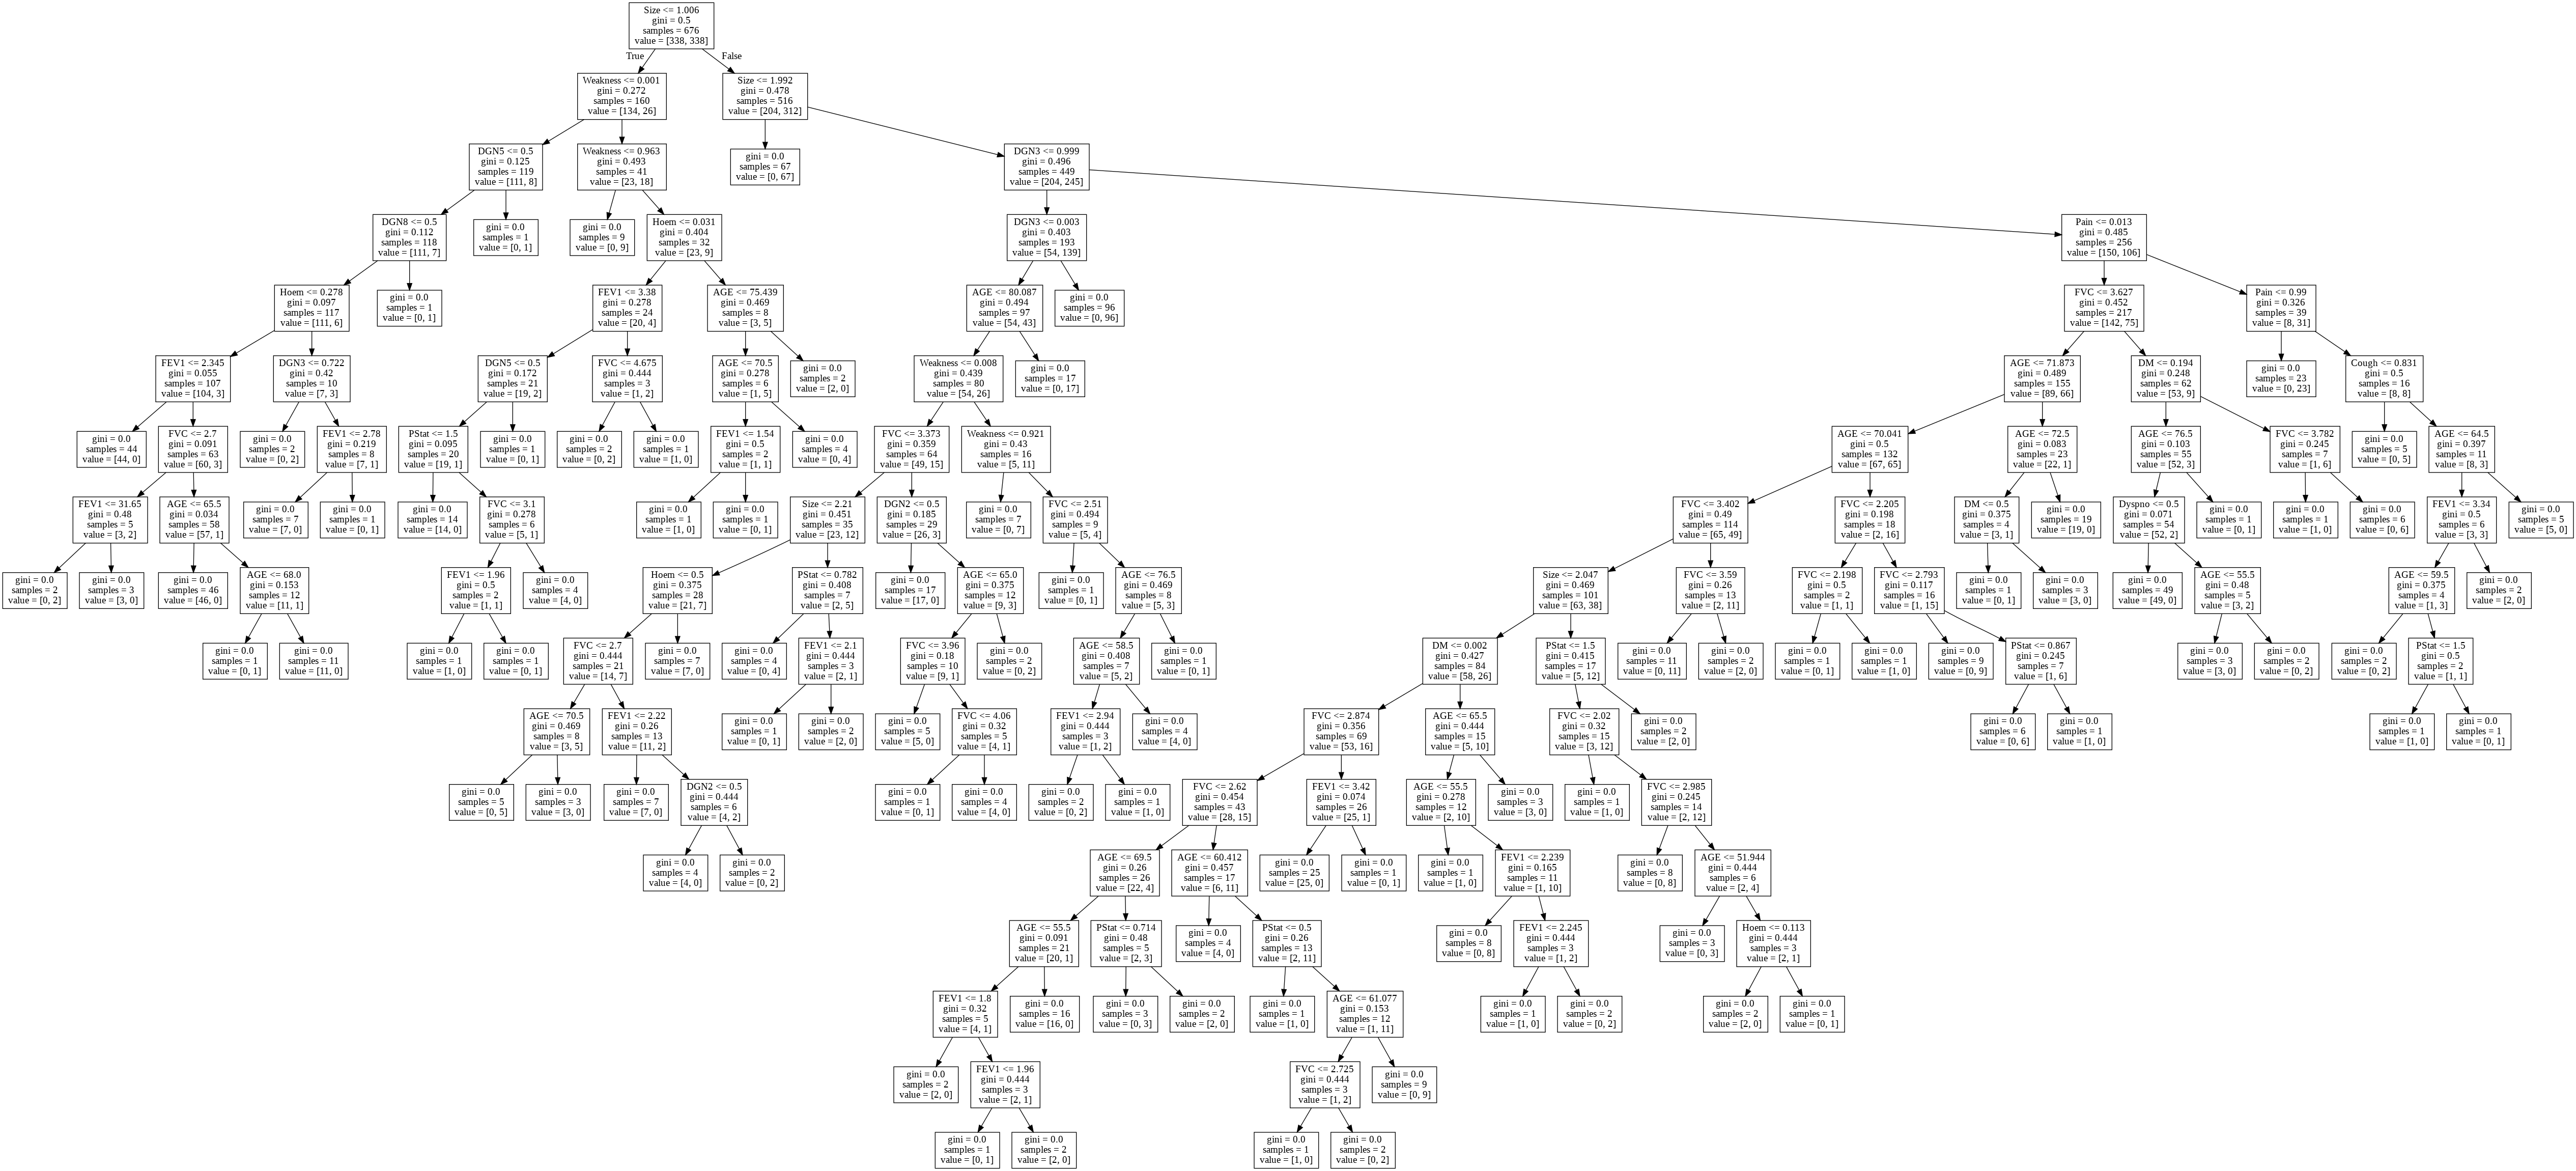

In [ ]:
import pydot
from IPython.display import Image
from sklearn.tree import export_graphviz
dot_code = export_graphviz(DecisionTree1, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dot_code)
Image(graph[0].create_png())

This one has been printed mostly to have an idea on how our decision tree works in this case. Next we are going to inspect it more.

In [ ]:
y_pred = DecisionTree1.predict(X_test)
print(f"Maximum depth of the tree is {DecisionTree1.get_depth()}")
DecisionTree1.get_depth()
print(classification_report(y_test, y_pred))

Maximum depth of the tree is 16
              precision    recall  f1-score   support

           0       0.89      0.82      0.86        62
           1       0.21      0.33      0.26         9

    accuracy                           0.76        71
   macro avg       0.55      0.58      0.56        71
weighted avg       0.81      0.76      0.78        71



With the classification report printed above, we have an idea of the overall perfomances of the tree. It is know that the tree we are training sometimes overfits the data. We can use some of the parameters of the tree to lessen the entity of this overfitting. For example, if we limit the maximum  depth(max_depth) that can be reached by the tre, we might prevent the tree going too deep. Since over typically occurs at deeper levels of the tree, where decision are taken only on small fraction of the data, this might be an effective way of "pruning" the tree. Another way of limiting this overfitting is through min_impurity_decrease. Now, through the “grid search” process we can test various configurations and identify the best one for our problem. We know that from the previous snippet of code that the maximum depth that our tree reaches is 15. So, first of all we should not tune values of depth higher than that.

In [ ]:
tree_params = {
  "max_depth": [None, 5, 9, 13, 16],
  "min_impurity_decrease": [0, .01, .03, .07, .09, .11]
}

accuracies = []
for config in ParameterGrid(tree_params):
  clf = DecisionTreeClassifier(**config)
  clf.fit(X_train_ov, y_train_ov)
  accuracies.append(accuracy_score(y_test, clf.predict(X_test)))
print(f"The maximum accuracy is {max(accuracies)}")

The maximum accuracy is 0.8732394366197183


We saw a slight increase in term of accuracy. The problem in this estimation is that it can be a way biased: we have perfomed the configuration that performs best in our test set. Much like there can be the risk of overfitting on the training data, because we lean "too well", there is also a risk of overfitting on the data we use for validation, if we keep tuning our hyperparameters to optimize the performance on this dataset. So what can we do? We can use three separate dataset: the *training* for training the model, *validation* for deciding which one to use and *test* set to get a final estimate on hoe good is our classifier.

In this case we have a limited amount of data, 470 rows, if we do not consider oversampling, so the k-fold cross validation technique is a good option for our case study.

In [ ]:
all_scores = {
    'DT' : {
      'accuracy': [],
      'precision' : [],
      'recall' : [],
      'f1_score' : []
    },
    'RF' : {
      'accuracy': [],
      'precision' : [],
      'recall' : [],
      'f1_score' : []
    },
    'KNN' : {
      'accuracy': [],
      'precision' : [],
      'recall' : [],
      'f1_score' : []
    },

    'SVM' : {
      'accuracy': [],
      'precision' : [],
      'recall' : [],
      'f1_score' : []
    }
    
}

In [ ]:
def build_classifier(X_train, y_train, X_test, y_test, clf_to_evaluate, clfname, score, param_grid, n_folds=3):
    print(f"Hyperparameters tuning for {score}\n")
    clf=GridSearchCV(clf_to_evaluate, param_grid, cv=n_folds, scoring=score, verbose=True, n_jobs=4, iid=True)
    clf.fit(X_train, y_train)

    print("This are the best param found on the dev set:\n")
    print(clf.best_params_)
    print()
    means = clf.cv_results_['mean_test_score']
    std_devs = clf.cv_results_['std_test_score']
    for means, std_devs, params in zip(means, std_devs, clf.cv_results_['params']):
      print("%0.3f (+/-%0.03f) for %r" % (means, std_devs * 2, params))
      print()

    print("Detailed classification report:")
    print()

    y_pred = clf.predict(X_test)
    print("Report has to be refered to the test set\n")
    print(classification_report(y_test, y_pred))
    print()
    
    all_scores[clfname]['accuracy'] = accuracy_score(y_test,y_pred)
    all_scores[clfname]['recall'] = recall_score(y_test, y_pred, average='weighted')
    all_scores[clfname]['f1_score'] = f1_score(y_test, y_pred, average='weighted')
    all_scores[clfname]['precision'] = precision_score(y_test, y_pred, average='weighted')
    return clf




In [ ]:
score = 'f1_weighted'
clf_to_evaluate = DecisionTreeClassifier()
best_clf = build_classifier(X_train_ov, y_train_ov, X_test, y_test, clf_to_evaluate, 'DT', score, tree_params)

Hyperparameters tuning for f1_weighted

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


This are the best param found on the dev set:

{'max_depth': 16, 'min_impurity_decrease': 0}

0.851 (+/-0.153) for {'max_depth': None, 'min_impurity_decrease': 0}

0.774 (+/-0.170) for {'max_depth': None, 'min_impurity_decrease': 0.01}

0.639 (+/-0.082) for {'max_depth': None, 'min_impurity_decrease': 0.03}

0.403 (+/-0.205) for {'max_depth': None, 'min_impurity_decrease': 0.07}

0.332 (+/-0.002) for {'max_depth': None, 'min_impurity_decrease': 0.09}

0.332 (+/-0.002) for {'max_depth': None, 'min_impurity_decrease': 0.11}

0.769 (+/-0.101) for {'max_depth': 5, 'min_impurity_decrease': 0}

0.739 (+/-0.144) for {'max_depth': 5, 'min_impurity_decrease': 0.01}

0.639 (+/-0.082) for {'max_depth': 5, 'min_impurity_decrease': 0.03}

0.403 (+/-0.205) for {'max_depth': 5, 'min_impurity_decrease': 0.07}

0.332 (+/-0.002) for {'max_depth': 5, 'min_impurity_decrease': 0.09}

0.332 (+/-0.002) for {'max_depth': 5, 'min_impurity_decrease': 0.11}

0.820 (+/-0.123) for {'max_depth': 9, 'min_impurity_de

[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:    0.3s finished


With k-fold cross validation technique we've obtained more or less the same results in terms of f1-score and accuracy.

Let's try now, to apply all this stuff to other classfication techinques, starting from **Random Forest**

In [ ]:
forest_params = {
    'n_estimators': [5, 10, 20, 35, 40],
    'max_depth': [None, 5, 9, 13, 16]
}

score = 'f1_weighted'
best_clf = build_classifier(X_train_ov, y_train_ov, X_test, y_test, RandomForestClassifier(), 'RF', score, forest_params)

[Parallel(n_jobs=4)]: Done  68 out of  75 | elapsed:    2.4s remaining:    0.2s


This are the best param found on the dev set:

{'max_depth': 16, 'n_estimators': 20}

0.841 (+/-0.136) for {'max_depth': None, 'n_estimators': 5}

0.858 (+/-0.195) for {'max_depth': None, 'n_estimators': 10}

0.866 (+/-0.172) for {'max_depth': None, 'n_estimators': 20}

0.869 (+/-0.176) for {'max_depth': None, 'n_estimators': 35}

0.880 (+/-0.189) for {'max_depth': None, 'n_estimators': 40}

0.773 (+/-0.115) for {'max_depth': 5, 'n_estimators': 5}

0.821 (+/-0.152) for {'max_depth': 5, 'n_estimators': 10}

0.826 (+/-0.120) for {'max_depth': 5, 'n_estimators': 20}

0.825 (+/-0.171) for {'max_depth': 5, 'n_estimators': 35}

0.831 (+/-0.196) for {'max_depth': 5, 'n_estimators': 40}

0.845 (+/-0.137) for {'max_depth': 9, 'n_estimators': 5}

0.840 (+/-0.233) for {'max_depth': 9, 'n_estimators': 10}

0.846 (+/-0.195) for {'max_depth': 9, 'n_estimators': 20}

0.864 (+/-0.182) for {'max_depth': 9, 'n_estimators': 35}

0.856 (+/-0.187) for {'max_depth': 9, 'n_estimators': 40}

0.853 (+/-0.150) 

[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    2.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Hyperparameters tuning for f1_weighted

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  68 out of  75 | elapsed:    2.4s remaining:    0.2s


This are the best param found on the dev set:

{'max_depth': 13, 'n_estimators': 40}

0.836 (+/-0.147) for {'max_depth': None, 'n_estimators': 5}

0.887 (+/-0.194) for {'max_depth': None, 'n_estimators': 10}

0.871 (+/-0.208) for {'max_depth': None, 'n_estimators': 20}

0.871 (+/-0.164) for {'max_depth': None, 'n_estimators': 35}

0.863 (+/-0.164) for {'max_depth': None, 'n_estimators': 40}

0.773 (+/-0.107) for {'max_depth': 5, 'n_estimators': 5}

0.818 (+/-0.137) for {'max_depth': 5, 'n_estimators': 10}

0.821 (+/-0.167) for {'max_depth': 5, 'n_estimators': 20}

0.817 (+/-0.220) for {'max_depth': 5, 'n_estimators': 35}

0.823 (+/-0.142) for {'max_depth': 5, 'n_estimators': 40}

0.825 (+/-0.200) for {'max_depth': 9, 'n_estimators': 5}

0.855 (+/-0.140) for {'max_depth': 9, 'n_estimators': 10}

0.860 (+/-0.161) for {'max_depth': 9, 'n_estimators': 20}

0.861 (+/-0.186) for {'max_depth': 9, 'n_estimators': 35}

0.864 (+/-0.196) for {'max_depth': 9, 'n_estimators': 40}

0.845 (+/-0.107) 

[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    2.7s finished


Let's now move on **K-NN technique**. We will compare all the results in some plots at the end.

In [ ]:
score ='f1_weighted'
KNN_params = {
    'n_neighbors':[3,5,7],
    'weights':['uniform','distance']
              
}
best_clf = build_classifier(X_train_ov, y_train_ov, X_test, y_test, KNeighborsClassifier(), 'KNN', score, KNN_params)


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Hyperparameters tuning for f1_weighted

Fitting 3 folds for each of 6 candidates, totalling 18 fits
This are the best param found on the dev set:

{'n_neighbors': 3, 'weights': 'distance'}

0.753 (+/-0.019) for {'n_neighbors': 3, 'weights': 'uniform'}

0.772 (+/-0.020) for {'n_neighbors': 3, 'weights': 'distance'}

0.729 (+/-0.011) for {'n_neighbors': 5, 'weights': 'uniform'}

0.751 (+/-0.023) for {'n_neighbors': 5, 'weights': 'distance'}

0.701 (+/-0.020) for {'n_neighbors': 7, 'weights': 'uniform'}

0.737 (+/-0.021) for {'n_neighbors': 7, 'weights': 'distance'}

Detailed classification report:

Report has to be refered to the test set

              precision    recall  f1-score   support

           0       0.88      0.68      0.76        62
           1       0.13      0.33      0.19         9

    accuracy                           0.63        71
   macro avg       0.50      0.51      0.48        71
weighted avg       0.78      0.63      0.69        71




[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Hyperparameters tuning for f1_weighted

Fitting 3 folds for each of 6 candidates, totalling 18 fits
This are the best param found on the dev set:

{'n_neighbors': 3, 'weights': 'distance'}

0.753 (+/-0.019) for {'n_neighbors': 3, 'weights': 'uniform'}

0.772 (+/-0.020) for {'n_neighbors': 3, 'weights': 'distance'}

0.729 (+/-0.011) for {'n_neighbors': 5, 'weights': 'uniform'}

0.751 (+/-0.023) for {'n_neighbors': 5, 'weights': 'distance'}

0.701 (+/-0.020) for {'n_neighbors': 7, 'weights': 'uniform'}

0.737 (+/-0.021) for {'n_neighbors': 7, 'weights': 'distance'}

Detailed classification report:

Report has to be refered to the test set

              precision    recall  f1-score   support

           0       0.88      0.68      0.76        62
           1       0.13      0.33      0.19         9

    accuracy                           0.63        71
   macro avg       0.50      0.51      0.48        71
weighted avg       0.78      0.63      0.69        71




[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed:    0.2s finished


The last classifier we implement is the SVM.

In [ ]:
score = 'f1_weighted'
SVC_params = {
    'decision_function_shape':['ovo'], 
    'C':[1, 10, 100, 500, 1000,5000,10000], 
    'kernel':['rbf', 'sigmoid']}
best_clf = build_classifier(X_train_ov, y_train_ov, X_test, y_test, SVC(), 'SVM', score, SVC_params)
clf = SVC(**best_clf.best_params_)
clf.fit(X_train_ov, y_train_ov)
precision, recall, f1, support = precision_recall_fscore_support(y_test, clf.predict(X_test))
print(f1)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Hyperparameters tuning for f1_weighted

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=4)]: Done  42 out of  42 | elapsed:    0.9s finished


This are the best param found on the dev set:

{'C': 10000, 'decision_function_shape': 'ovo', 'kernel': 'rbf'}

0.517 (+/-0.050) for {'C': 1, 'decision_function_shape': 'ovo', 'kernel': 'rbf'}

0.384 (+/-0.078) for {'C': 1, 'decision_function_shape': 'ovo', 'kernel': 'sigmoid'}

0.597 (+/-0.132) for {'C': 10, 'decision_function_shape': 'ovo', 'kernel': 'rbf'}

0.519 (+/-0.089) for {'C': 10, 'decision_function_shape': 'ovo', 'kernel': 'sigmoid'}

0.677 (+/-0.034) for {'C': 100, 'decision_function_shape': 'ovo', 'kernel': 'rbf'}

0.519 (+/-0.089) for {'C': 100, 'decision_function_shape': 'ovo', 'kernel': 'sigmoid'}

0.693 (+/-0.014) for {'C': 500, 'decision_function_shape': 'ovo', 'kernel': 'rbf'}

0.518 (+/-0.088) for {'C': 500, 'decision_function_shape': 'ovo', 'kernel': 'sigmoid'}

0.689 (+/-0.025) for {'C': 1000, 'decision_function_shape': 'ovo', 'kernel': 'rbf'}

0.518 (+/-0.088) for {'C': 1000, 'decision_function_shape': 'ovo', 'kernel': 'sigmoid'}

0.694 (+/-0.024) for {'C': 5000,

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 out of  42 | elapsed:    0.9s finished


This are the best param found on the dev set:

{'C': 10000, 'decision_function_shape': 'ovo', 'kernel': 'rbf'}

0.517 (+/-0.050) for {'C': 1, 'decision_function_shape': 'ovo', 'kernel': 'rbf'}

0.384 (+/-0.078) for {'C': 1, 'decision_function_shape': 'ovo', 'kernel': 'sigmoid'}

0.597 (+/-0.132) for {'C': 10, 'decision_function_shape': 'ovo', 'kernel': 'rbf'}

0.519 (+/-0.089) for {'C': 10, 'decision_function_shape': 'ovo', 'kernel': 'sigmoid'}

0.677 (+/-0.034) for {'C': 100, 'decision_function_shape': 'ovo', 'kernel': 'rbf'}

0.519 (+/-0.089) for {'C': 100, 'decision_function_shape': 'ovo', 'kernel': 'sigmoid'}

0.693 (+/-0.014) for {'C': 500, 'decision_function_shape': 'ovo', 'kernel': 'rbf'}

0.518 (+/-0.088) for {'C': 500, 'decision_function_shape': 'ovo', 'kernel': 'sigmoid'}

0.689 (+/-0.025) for {'C': 1000, 'decision_function_shape': 'ovo', 'kernel': 'rbf'}

0.518 (+/-0.088) for {'C': 1000, 'decision_function_shape': 'ovo', 'kernel': 'sigmoid'}

0.694 (+/-0.024) for {'C': 5000,

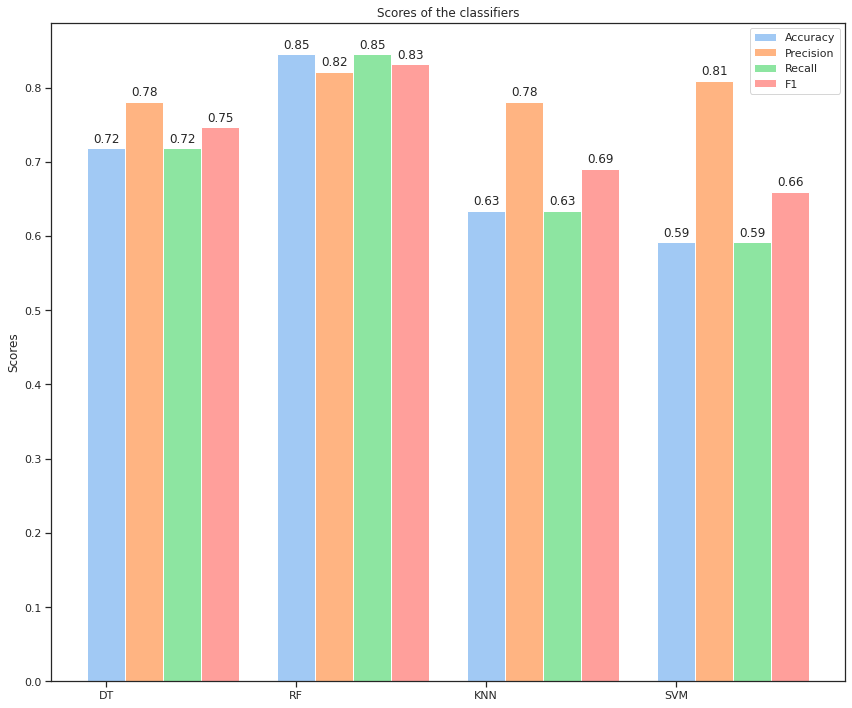

	accuracy  		precision 		recall    		f1_score  		
DT	0.7183098591549296	0.7809859154929578	0.7183098591549296	0.746359513010265	
RF	0.8450704225352113	0.8214517876489708	0.8450704225352113	0.8314073416879229	
KNN	0.6338028169014085	0.7806184935701163	0.6338028169014085	0.6906049935979514	
SVM	0.5915492957746479	0.8091721058055651	0.5915492957746479	0.6598786144800093	


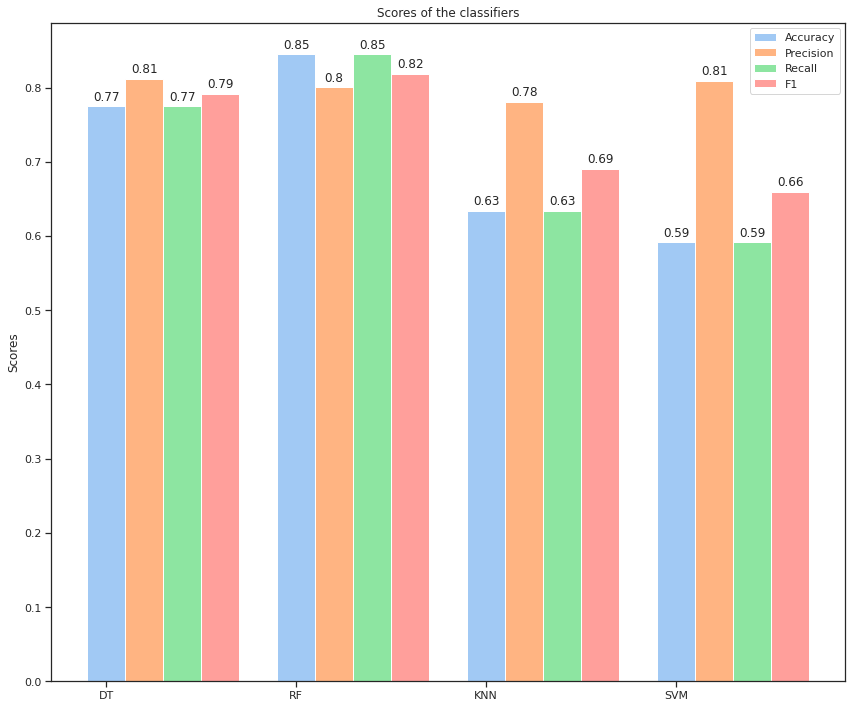

	accuracy  		precision 		recall    		f1_score  		
DT	0.7746478873239436	0.812156760189786	0.7746478873239436	0.791378574477166	
RF	0.8450704225352113	0.8006621820475088	0.8450704225352113	0.81827878421393	
KNN	0.6338028169014085	0.7806184935701163	0.6338028169014085	0.6906049935979514	
SVM	0.5915492957746479	0.8091721058055651	0.5915492957746479	0.6598786144800093	


In [ ]:
labels = list(all_scores.keys())
accuracies = [v['accuracy'] for v in all_scores.values()]
precisions = [v['precision'] for v in all_scores.values()]
recalls = [v['recall'] for v in all_scores.values()]
f1s = [v['f1_score'] for v in all_scores.values()]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
rects1 = ax.bar(x, accuracies, width, label='Accuracy')
rects2 = ax.bar(x + 0.2, precisions, width, label='Precision')
rects3 = ax.bar(x + 0.4, recalls, width, label='Recall')
rects4 = ax.bar(x + 0.6, f1s, width, label='F1')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores of the classifiers')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

Performances = list(all_scores['DT'].keys())
print(end='\t')
for p in Performances:
  print('{0:<10}' .format(p), end='\t\t')

print()
for k, v in(all_scores.items()):
  print(k, end='\t')
  for k1, v1 in v.items():
    print(v1, end='\t')
  print()

# Conclusions

We observed by the scores in every classifier that class 1 (the patienet will not survive in one year period) is harder to predict. Even if we oversampled our dataset with SMOTE technique, this may can due to the fact that in the original dataset this class is way less rapresented.

Unfortunatly it is not specified in the description of the dataset what the codes of the diagnosis mean, but we observed that two of them are particulary diffused DGN2 and DGN3, for both the target classes.

Looking at the perfonces, in terms of f1-score, Random Forest is the classifier wich has performed best, while KNN and SVM are worse.

Finally, in the hypothesys we had some new patients, and so new unlabeled data to predict, we can train the classifier with the whole dataset, and perform the predictions in the new data.
